# Word2Vec
This notebook uses resulting word2vec vectors and clusters them with Ward algorithm
<br>
http://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html

In [ ]:
import gensim
model = gensim.models.Word2Vec.load(r"C:\nlp\word2vec_1.bin")
print("Number of vocabs is", len(model.wv.vocab))

# Ward Hierarchical clustering

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

%matplotlib inline
# np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

The follwing block does the following:
- wordNumberDict = dict for matching words to numbers, so that words could be used in numpy arrays
- Create a dictionary of {word # : word vectors}

In [ ]:
wordVectorDict = { word: model[word] for word in model.wv.vocab.keys()} # is a Dictionary of {word : word vector}
wordVectors = np.array(list(wordVectorDict.values()))
words = np.array(list(wordVectorDict.keys()))

wordNumberDict = { wd : i for i, wd in enumerate(words) } # dict to index words to numbers, words need to be numbers for numpy array
wordNumberDict_inv = {num: wd for num, wd in wordNumberDict.items()}
wordVectorDict = { wordNumberDict[wd]: model[wd] for wd in words } # replace words(=keys) with word numbers

# New set of word and vectors
wordVectors = np.array(list(wordVectorDict.values()))
words = np.array(list(wordVectorDict.keys()))

wordMatrix = np.column_stack((words, wordVectors))

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(wordVectors)

In [18]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


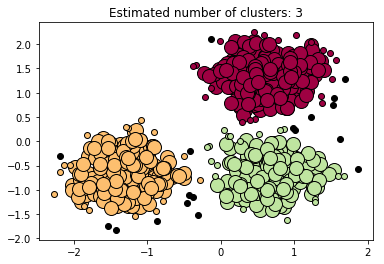

In [19]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [37]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


MemoryError: 

In [28]:
print(words.shape)
print(wordVectors.shape)

(89008,)
(89008, 100)


In [133]:
import pickle
# pickle.dump(kmeans_model, open(r"C:\nlp\Kmeans_300clusters.pkl", 'wb'))
kmeans_model = pickle.load(open(r"C:\nlp\Kmeans_500clusters.pkl", 'rb'))

In [50]:
clusterToWords[499]

['disturb_VBN',
 'semiarid_JJ',
 'stretch_NNS',
 'clear_VBN',
 'rise_VBP',
 'refuge_NNS',
 'salty_JJ',
 'ditch_NNS',
 'flood_VBN',
 'waterway_NNS',
 'year-round_JJ',
 'canopy_NNS',
 'graze_VBN',
 'deep_JJS',
 'deep-sea_JJ',
 'hydrothermal_JJ',
 'oceanic_JJ',
 'permafrost_NN',
 'watershed_JJ',
 'pool_NN',
 'detritus_NN',
 'log_NNS',
 'mangrove_JJ',
 'sedimentation_NN',
 'disrupt_VBN',
 'portion_NNS',
 'fragile_JJ',
 'smog_NN',
 'melt_VBZ',
 'snowfall_NN',
 'shelf_NN',
 'drain_VBN',
 'inaccessible_JJ',
 'sink_VBZ',
 'upwelling_NN',
 'protect_VBD',
 'thrive_VBP',
 'erode_VB',
 'infestation_NN',
 'monsoon_NN',
 'sparse_JJ',
 'regrowth_NN',
 'dormant_JJ',
 'dune_NN',
 'herbaceous_JJ',
 'disturbed_JJ',
 'himalayan_JJ',
 'upstream_JJ',
 'landslide_NNS',
 'surrounding_JJ',
 'mountainous_JJ',
 'aquifer_NNS',
 'corridor_NNS',
 'depositional_JJ',
 'erode_VBN',
 'planting_NN',
 'wreak_VBD',
 'rangeland_NN',
 'saltwater_NN',
 'lagoon_NNS',
 'creek_NNS',
 'inhospitable_JJ',
 'subsurface_JJ',
 'resil

In [29]:
clusterToWords[30]

['eye_NN',
 'photograph_NNS',
 'viewer_NN',
 'film_NNS',
 'display_NN',
 'telescope_NN',
 'color_NN',
 'image_NN',
 'color_NNS',
 'image_NNS',
 'exposure_NN',
 'film_NN',
 'imaging_NN',
 'observe_VBG',
 'background_NN',
 'mount_VBP',
 'scene_NN',
 'scanning_NN',
 'microscope_NN',
 'footage_NN',
 'instrument_NN',
 'drawing_NNS',
 'filter_NN',
 'picture_NNS',
 'photo_NNS',
 'visual_JJ',
 'projector_NN',
 'projection_NN',
 'screen_NN',
 'resolution_NN',
 'zoom_NN',
 'flash_NN',
 'print_VBN',
 'screen_NNS',
 'view_VBG',
 'record_VBG',
 'slide_NN',
 'infrared_JJ',
 'optic_NNS',
 'canon_NN',
 'slide_NNS',
 'lighting_NN',
 'lcd_NN',
 'optical_JJ',
 'projector_NNS',
 'viewing_NN',
 'light_NNS',
 'picture_NN',
 'sharp_JJ',
 'lens_NN',
 'camera_NNS',
 'scene_NNS',
 'display_NNS',
 'mirror_NN',
 'close-up_NN',
 'photography_NN',
 'black-and-white_JJ',
 'focal_JJ',
 'mirror_VBZ',
 'camera_NN',
 'video_JJ',
 'detail_NN',
 'scope_NN',
 'sound_NNS',
 'frame_NNS',
 'exposure_NNS',
 'ccd_NN',
 'spectro

### T-SNE and scatter plot

In [43]:
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
import pandas as pd

def plot_cluster(number, plot_x=10, plot_y=10):
    """
    Plots the given cluster number
    
    params
    :plot_x - size of plot X axis in inches 
    :plot_y - size of plot Y axis in inches
    """
    
    vocab = clusterToWords[number]
    vectors = [model[word] for word in vocab]

    print("Clustering", len(vocab), "words")

    tsne = TSNE(n_components=2, init = 'pca', random_state=7)
    X_tsne = tsne.fit_transform(vectors)

    df = pd.concat([pd.DataFrame(X_tsne), pd.Series(vocab)], axis = 1)
    df.columns = ['x', 'y', 'word']

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(df['x'], df['y'])

    for i, txt in enumerate(df['word']):
        ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
        
    plt.rcParams["figure.figsize"] = [plot_x, plot_y]
    plt.show()

In [90]:
clusterToWords

{0: ['out-of-the-way_JJ',
  'reopen_VBD',
  'joke_VB',
  'roundtable_JJ',
  'helena_NN',
  'cornell_VBP',
  'rat_VBZ',
  'endler_NN',
  'arne_NN',
  'lundberg_NN',
  'artifice_NN',
  'formalize_VBD',
  'fledge_VBD',
  'anthropology_JJ',
  'scribner_NN',
  'carle_NN',
  'rodolfo_NN',
  'mumbai_NNS',
  'kumar_JJ',
  'mittal_NN',
  'hgp_NN',
  'cavalier-smith_JJ',
  'kidwell_NN',
  'juggling_NN',
  'exercise_VBD',
  'tsao_NN',
  'lament_NNS',
  'relinquish_VBN',
  'marchand_NN',
  'earthwatch_NN',
  'derbyshire_NN',
  'zoetrope_NN',
  'weeklong_NN',
  'bscs_NNS',
  'christa_NN',
  'teller_NNS',
  'nominee_NN',
  'epcot_NN',
  'brownie_NN',
  'chia_NN',
  'centennial_JJ',
  'gazette_NN',
  'deborah_VBP',
  'outlive_VBN',
  'teri_NN',
  'fredericksburg_NN',
  'weeklong_JJ',
  'armonk_NN',
  'www.hp.com_NNP',
  'wisconsin-madison_JJ',
  'reprint_VB',
  'shedd_NN',
  'oceanarium_NN',
  'searcher_NN',
  'fifth-graders_NNS',
  'high-scoring_JJ',
  'halter_NN',
  'purport_VBG',
  'pamphlet_JJ',


Show how many items are in each cluster

In [132]:
cluster_size_order = {"Cluster no."+str(i) : len(clusterToWords[i]) for i in range(300)}

import operator
temp = sorted(cluster_size_order.items(), key=operator.itemgetter(1)) 
temp

[('Cluster no.186', 1),
 ('Cluster no.155', 2),
 ('Cluster no.184', 2),
 ('Cluster no.194', 2),
 ('Cluster no.213', 2),
 ('Cluster no.252', 2),
 ('Cluster no.257', 2),
 ('Cluster no.261', 2),
 ('Cluster no.296', 2),
 ('Cluster no.297', 2),
 ('Cluster no.278', 3),
 ('Cluster no.150', 4),
 ('Cluster no.243', 4),
 ('Cluster no.273', 4),
 ('Cluster no.75', 5),
 ('Cluster no.168', 5),
 ('Cluster no.224', 5),
 ('Cluster no.234', 5),
 ('Cluster no.255', 5),
 ('Cluster no.103', 6),
 ('Cluster no.152', 6),
 ('Cluster no.160', 6),
 ('Cluster no.206', 6),
 ('Cluster no.270', 6),
 ('Cluster no.176', 8),
 ('Cluster no.221', 8),
 ('Cluster no.265', 8),
 ('Cluster no.272', 8),
 ('Cluster no.15', 9),
 ('Cluster no.60', 9),
 ('Cluster no.89', 9),
 ('Cluster no.156', 9),
 ('Cluster no.293', 9),
 ('Cluster no.161', 10),
 ('Cluster no.200', 10),
 ('Cluster no.286', 10),
 ('Cluster no.178', 11),
 ('Cluster no.202', 11),
 ('Cluster no.226', 11),
 ('Cluster no.245', 11),
 ('Cluster no.115', 12),
 ('Cluster n

Clustering 518 words


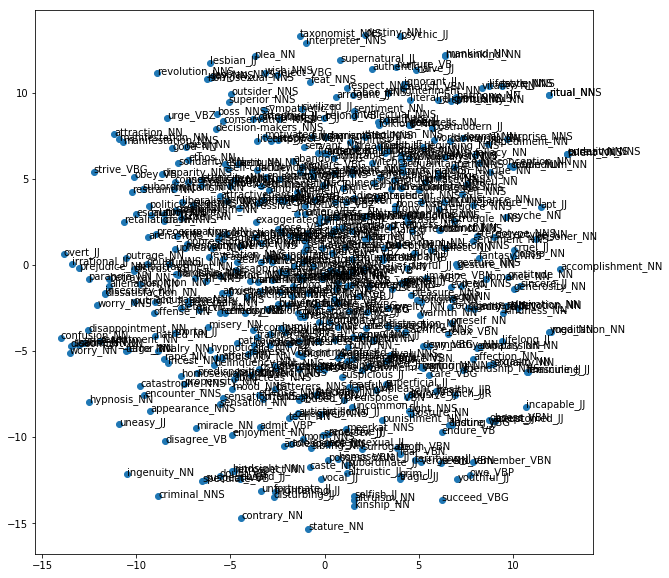

In [131]:
plot_cluster(30)

In [39]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)

# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

Current size: [6.0, 4.0]


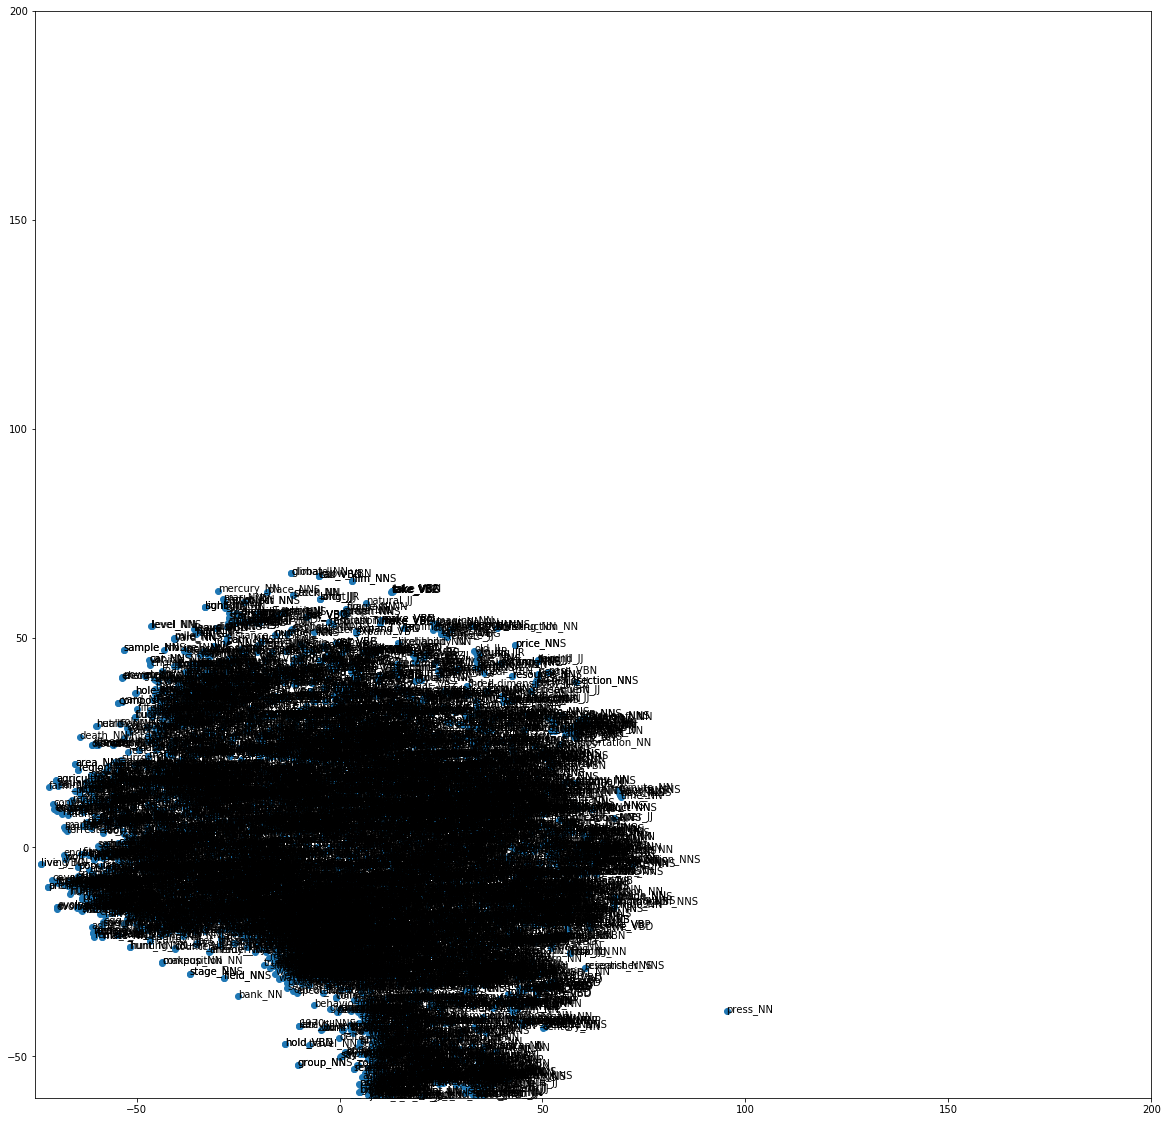

In [34]:
ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

fig.set_size_inches((20,20))
fig